In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incomplete3NWHDM/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp_uamjykxtfds'),
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
for i, exapmle in enumerate(dataset['train']):
  # example = (image, label)
  image, label = exapmle
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir,exist_ok = True)

  filename = save_dir + "/" +"{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break
  # print(save_dir)
  # break

CNN Building Block


*   Input Layer
*   Convolutional Layer
*   Pooling Layer
*   Dropout Layer
*   Batch Normalization Layer
*   Activation Layer
*   Fully Connected Layer
*   Flatten Layer
*   Output layer













In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.2, rotation_range = 10,
                              height_shift_range = 0.1,
                             shear_range = 0.1, zoom_range= 0.10,horizontal_flip = True )
train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',target_size = (150, 150),
                                              batch_size = 128, class_mode = 'binary',
                                              subset = 'training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',target_size = (150, 150),
                                              batch_size = 128, class_mode = 'binary',
                                              subset = 'validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


# Building CNN model

In [ ]:
from keras.backend import batch_normalization
model = Sequential()

#1st Layer of CNN
model.add(Conv2D(32,kernel_size =3, activation='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#2nd Layer of CNN
model.add(Conv2D(64,kernel_size =3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#3rd layer of CNN
model.add(Conv2D(128,kernel_size =3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))          #only single dense layer
model.add(Dense(1, activation = 'sigmoid'))       #final dense layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 74, 74, 32)        128       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)       

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
histroy = model.fit(train_generator, epochs = 15, validation_data = validation_generator)

Epoch 1/15
146/146 [==============================] - 162s 1s/step - loss: 0.5398 - accuracy: 0.7312 - val_loss: 0.5629 - val_accuracy: 0.7254
Epoch 2/15
146/146 [==============================] - 155s 1s/step - loss: 0.4670 - accuracy: 0.7757 - val_loss: 0.5044 - val_accuracy: 0.7547
Epoch 3/15
146/146 [==============================] - 154s 1s/step - loss: 0.4273 - accuracy: 0.8003 - val_loss: 0.4917 - val_accuracy: 0.7818
Epoch 4/15
146/146 [==============================] - 154s 1s/step - loss: 0.3991 - accuracy: 0.8132 - val_loss: 0.4327 - val_accuracy: 0.8086
Epoch 5/15
146/146 [==============================] - 152s 1s/step - loss: 0.3720 - accuracy: 0.8340 - val_loss: 0.4094 - val_accuracy: 0.8153
Epoch 6/15
146/146 [==============================] - 153s 1s/step - loss: 0.3499 - accuracy: 0.8465 - val_loss: 0.3929 - val_accuracy: 0.8284
Epoch 7/15
146/146 [==============================] - 154s 1s/step - loss: 0.3317 - accuracy: 0.8528 - val_loss: 0.3901 - val_accuracy: 0.8351

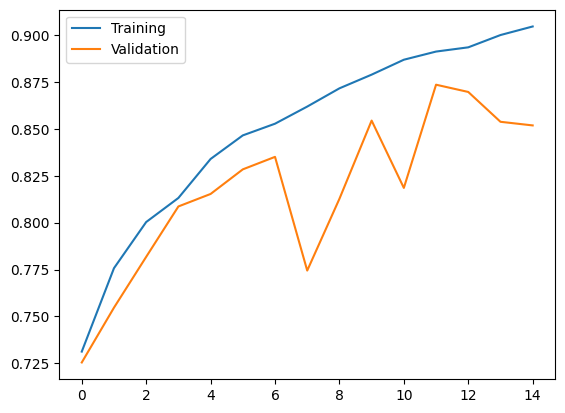

In [ ]:
histroy.history
plt.plot(histroy.history['accuracy'], label = 'Training')
plt.plot(histroy.history['val_accuracy'], label = 'Validation')
plt.legend(['Training','Validation'])

In [ ]:
#save model
model.save('cats_vs_dogs')

In [ ]:
model_load = tf.keras.models.load_model('cats_vs_dogs')

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/advisor/wp-content/uploads/2023/07/top-20-small-dog-breeds.jpeg.jpg"
img = Image.open(requests.get(img_url, stream = True).raw).resize((150,150))
image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis = 0)
img = img/255
prediction = model.predict(img)
prediction

1/1 [==============================] - 0s 20ms/step


array([[0.7854021]], dtype=float32)

In [ ]:
TH = 0.5
prediction = int(prediction>TH)
prediction

<ipython-input-78-b10deb7e99cc>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction = int(prediction>TH)


1

In [ ]:
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

'dog'